# Decision Tree versus Random Forest, and Hyperparameter Optimisation

Read my blog post [Decision Tree versus Random Forest, and Hyperparameter Optimisation](https://daehnhardt.com/blog/2023/11/06/decision_trees_vs_random_forest_hyperparameters/) for more details.

In [ ]:
# Use for calculating the execution time on cell level:
# https://pypi.org/project/ipython-autotime/
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.55 s (started: 2023-11-06 11:57:23 +00:00)


# Decision Trees

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

time: 714 µs (started: 2023-11-06 11:57:30 +00:00)


In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/edaehn/python_tutorials/main/titanic/train.csv'
titanic = pd.read_csv(url)

# Drop unnecessary columns and handle missing values
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Survived'] = titanic['Survived'].astype(int)

# Define features (X) and target (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the data shapes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (712, 6), X_test: (179, 6)
y_train: (712,), y_test: (179,)


In [ ]:
# Create a DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree_clf.fit(X_train, y_train)

# Make predictions on the test data
decision_tree_y_pred = decision_tree_clf.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
print(f"Accuracy: {decision_tree_accuracy:.2f}")

Accuracy: 0.77


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_clf.fit(X_train, y_train)

# Make predictions on the test data
random_forest_y_pred = random_forest_clf.predict(X_test)

In [ ]:
# Calculate the accuracy of the Random Forest model
random_forest_clf_accuracy = accuracy_score(y_test, random_forest_y_pred)
print(f"Accuracy: {random_forest_clf_accuracy:.2f}")

Accuracy: 0.80


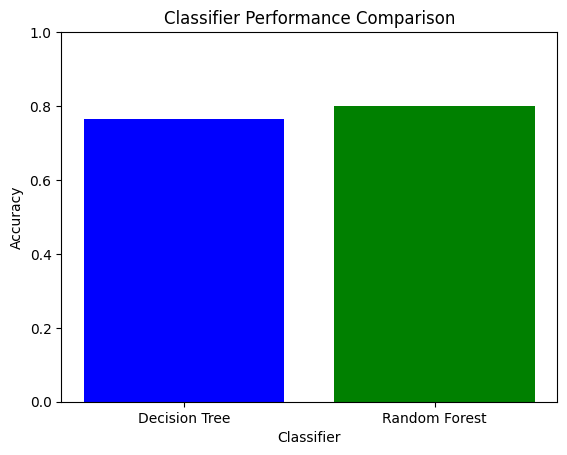

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# Create a bar chart to compare model accuracies
models = ['Decision Tree', 'Random Forest']
accuracies = [decision_tree_accuracy, random_forest_clf_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.ylim(0, 1)

plt.show()

[Text(0.4718265133304196, 0.9791666666666666, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Died'),
 Text(0.1784650895979021, 0.9375, 'Age <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Died'),
 Text(0.05244755244755245, 0.8958333333333334, 'SibSp <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = Survived'),
 Text(0.045454545454545456, 0.8541666666666666, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Survived'),
 Text(0.05944055944055944, 0.8541666666666666, 'Age <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Died'),
 Text(0.05244755244755245, 0.8125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Died'),
 Text(0.06643356643356643, 0.8125, 'Age <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Died'),
 Text(0.05944055944055944, 0.7708333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.07342657342657342, 0.7708333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = D

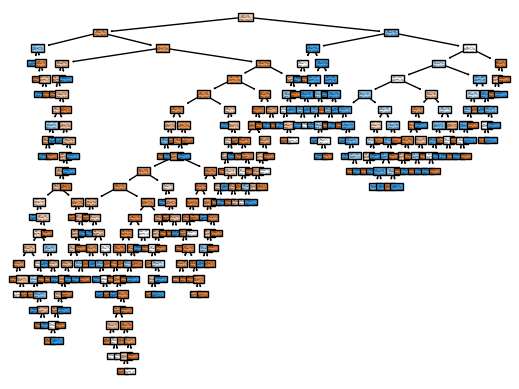

In [ ]:
# Import tree
from sklearn import tree

# Plot the decision tree
tree.plot_tree(decision_tree_clf, feature_names=X_train.columns, class_names=['Died','Survived'], filled=True)


# Hyperparameter optimisation techniques

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(random_forest_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

time: 35.4 s (started: 2023-11-06 11:57:52 +00:00)


In [ ]:
best_params


{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

In [ ]:
best_score

0.8313897370235399

## Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Random Search
random_search = RandomizedSearchCV(random_forest_clf, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_


time: 28.5 s (started: 2023-11-06 12:00:46 +00:00)


In [ ]:
best_params

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 186}

In [ ]:
best_score

0.8313897370235399

## Bayesian Optimisation

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter search space
param_space = {
    'n_estimators': (50, 200),
    'max_depth': (None, 10, 20),
    'min_samples_split': (2, 5, 10)
}


# Perform Bayesian Optimization
bayes_search = BayesSearchCV(random_forest_clf, param_space, cv=5, n_iter=10, n_jobs=-1)
bayes_search.fit(X_train, y_train)

# Best parameters and score
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_


time: 14.8 s (started: 2023-11-06 12:01:57 +00:00)


In [ ]:
best_params

OrderedDict([('max_depth', 10),
             ('min_samples_split', 10),
             ('n_estimators', 106)])

In [ ]:
best_score

0.8299911356249385

# Bias-Variance Challenge

This section is for my post [Bias-Variance Challenge](https://daehnhardt.com/blog/)

In [ ]:
from sklearn.model_selection import cross_val_score

time: 659 µs (started: 2023-11-06 13:07:20 +00:00)


In [ ]:
# Calculate the Decision Tree model's bias using cross-validation
bias_scores = cross_val_score(decision_tree_clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
bias = -bias_scores.mean()

# Calculate variance using cross-validation
variance = bias_scores.std()

print(f'Bias: {bias}')
print(f'Variance: {variance}')

Bias: 0.24998522604156403
Variance: 0.02736821291803949
time: 37.1 ms (started: 2023-11-06 13:06:27 +00:00)


In [ ]:


# Calculate the Random Forest model's bias using cross-validation
bias_scores = cross_val_score(random_forest_clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
bias = -bias_scores.mean()

# Calculate variance using cross-validation
variance = bias_scores.std()

print(f'Bias: {bias}')
print(f'Variance: {variance}')

Bias: 0.19808923470895298
Variance: 0.018009815555289254
time: 2.33 s (started: 2023-11-06 13:08:26 +00:00)
